In [1]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]

In [3]:
np.random.seed(7)
tf.random.set_seed(7)

In [4]:
max_words = 10000
maxlen = 500

In [13]:
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(X, maxlen=maxlen, truncating='pre')
label_dict = {'pos':0, 'neg':1}
y = np.array([label_dict[c] for c in categories])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape

((1600, 500), (400, 500))

In [15]:
model = Sequential([Embedding(max_words, 64, input_length=maxlen),
                    Conv1D(128, 5, padding='valid', activation='leaky_relu', strides=1),
                    MaxPooling1D(),
                    Conv1D(256, 5, padding='valid', activation='leaky_relu', strides=1),
                    MaxPooling1D(),
                    Flatten(),
                    Dense(64, activation='leaky_relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 496, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1  (None, 248, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 244, 256)          164096    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 122, 256)          0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 31232)             0

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, batch_size=256, verbose=1, validation_split=0.2)
history

Epoch 1/20
5/5 [==============================] - 3s 426ms/step - loss: 0.7220 - acc: 0.5227 - val_loss: 0.6935 - val_acc: 0.5031
Epoch 2/20
5/5 [==============================] - 2s 387ms/step - loss: 0.6882 - acc: 0.5055 - val_loss: 0.6901 - val_acc: 0.5844
Epoch 3/20
5/5 [==============================] - 2s 398ms/step - loss: 0.6676 - acc: 0.7398 - val_loss: 0.6842 - val_acc: 0.5500
Epoch 4/20
5/5 [==============================] - 2s 403ms/step - loss: 0.6217 - acc: 0.8109 - val_loss: 0.6558 - val_acc: 0.6125
Epoch 5/20
5/5 [==============================] - 2s 392ms/step - loss: 0.5241 - acc: 0.7852 - val_loss: 0.6303 - val_acc: 0.6438
Epoch 6/20
5/5 [==============================] - 2s 402ms/step - loss: 0.3471 - acc: 0.8852 - val_loss: 0.5066 - val_acc: 0.7688
Epoch 7/20
5/5 [==============================] - 2s 396ms/step - loss: 0.1637 - acc: 0.9656 - val_loss: 0.5597 - val_acc: 0.7219
Epoch 8/20
5/5 [==============================] - 2s 400ms/step - loss: 0.0546 - acc: 0.99

In [17]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

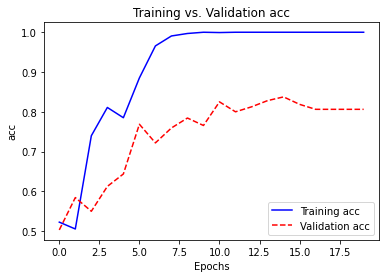

In [18]:
plot_results(history, 'acc')

In [19]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 13ms/step - loss: 0.9159 - acc: 0.8100


[0.9159015417098999, 0.8100000023841858]

In [20]:
model = Sequential([Embedding(max_words, 64, input_length=maxlen),
                    Conv1D(128, 10, padding='valid', activation='leaky_relu', strides=1),
                    MaxPooling1D(),
                    Conv1D(256, 10, padding='valid', activation='leaky_relu', strides=1),
                    MaxPooling1D(),
                    Conv1D(512, 10, padding='valid', activation='leaky_relu', strides=1),
                    MaxPooling1D(),
                    Flatten(),
                    Dense(64, activation='leaky_relu'),
                    Dense(32, activation='leaky_relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 64)           640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 491, 128)          82048     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 245, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 236, 256)          327936    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 118, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 109, 512)         

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, batch_size=256, verbose=1, validation_split=0.2)
history

Epoch 1/20
5/5 [==============================] - 8s 1s/step - loss: 0.7214 - acc: 0.4938 - val_loss: 0.6971 - val_acc: 0.4969
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 0.6949 - acc: 0.5063 - val_loss: 0.6931 - val_acc: 0.5125
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 0.6933 - acc: 0.4984 - val_loss: 0.6919 - val_acc: 0.5188
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 0.6906 - acc: 0.5039 - val_loss: 0.6894 - val_acc: 0.5188
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.6694 - acc: 0.5516 - val_loss: 0.6390 - val_acc: 0.6656
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.4893 - acc: 0.7898 - val_loss: 0.7828 - val_acc: 0.7031
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.2449 - acc: 0.8938 - val_loss: 0.7410 - val_acc: 0.7250
Epoch 8/20
5/5 [==============================] - 7s 1s/step - loss: 0.0921 - acc: 0.9688 - val_loss: 0.9005 - 

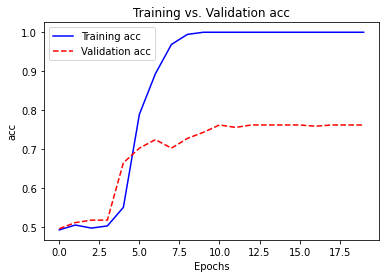

In [22]:
plot_results(history, 'acc')

In [23]:
# 마냥 계층을 더 추가한다고 더 좋은 결과가 나오지는 않음
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 35ms/step - loss: 2.3379 - acc: 0.7650


[2.3378891944885254, 0.7649999856948853]